<a href="https://colab.research.google.com/github/akshaykumar2972/POC2025/blob/main/POC_Ola.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_original = pd.read_csv('/content/ola_dataset.csv').drop_duplicates()
df_original.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [ ]:
df_original.shape

(19104, 14)

In [ ]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [ ]:
df_original.isnull().sum()

,0
Unnamed: 0,0
MMM-YY,0
Driver_ID,0
Age,61
Gender,52
City,0
Education_Level,0
Income,0
Dateofjoining,0
LastWorkingDate,17488


##**Data Cleaning**

In [ ]:
df_original.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df_original.rename(columns={'MMM-YY':'Monthly Reporting Date'}, inplace=True)
df_original['Monthly Reporting Date'] = pd.to_datetime(df_original['Monthly Reporting Date']).dt.date

In [ ]:
df_original['Age'].unique()

array([28., 31., 43., 29., 34., 35., 30., 39., 42., 27., 26., nan, 33.,
       40., 41., 32., 22., 44., 36., 21., 49., 37., 38., 46., 47., 48.,
       25., 24., 45., 51., 52., 23., 50., 53., 54., 55., 58.])

In [ ]:
df_original.loc[df_original['Age'].isnull()]

,Monthly Reporting Date,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
72,2020-02-01,20,NaN,1.0,C19,0,40342,25/10/19,NaN,3,3,0,1
97,2019-10-01,22,NaN,0.0,C10,2,31224,25/05/18,NaN,1,1,200000,3
110,2019-07-01,24,NaN,0.0,C24,2,76308,25/05/18,NaN,1,2,203240,3
212,2019-11-01,40,NaN,0.0,C15,0,59182,11/08/19,NaN,2,2,0,1
261,2019-05-01,49,NaN,0.0,C20,0,53039,25/05/18,NaN,1,2,124190,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18395,2020-05-01,2690,NaN,0.0,C11,2,77662,17/07/18,NaN,1,2,692600,4
18722,2020-08-01,2730,NaN,1.0,C16,2,69924,07/08/19,NaN,2,2,161860,2
18780,2019-03-01,2738,NaN,0.0,C17,0,23068,09/08/18,NaN,1,1,639780,3
18843,2019-01-01,2751,NaN,0.0,C17,2,53115,11/05/15,NaN,1,1,506550,3


In [ ]:
df_original['Age'] = df_original.groupby(['Education_Level', 'Income'])['Age'].transform(lambda x: x.fillna(x.median())).round().astype(int)

In [ ]:
df_original['Age'].isnull().sum()

np.int64(0)

In [ ]:
df_original.loc[df_original['Gender'].isnull()]

,Monthly Reporting Date,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
240,2019-02-01,43,27,NaN,C15,0,12906,13/07/18,20/02/19,1,1,0,1
258,2019-02-01,49,21,NaN,C20,0,53039,25/05/18,NaN,1,2,0,1
264,2019-08-01,49,21,NaN,C20,0,53039,25/05/18,NaN,1,2,300300,2
466,2019-08-01,68,31,NaN,C29,0,79288,18/10/15,NaN,1,3,544930,3
820,2019-02-01,116,21,NaN,C11,0,16477,12/04/18,NaN,1,1,129590,1
859,2019-11-01,119,31,NaN,C29,1,71000,16/11/19,NaN,3,3,0,1
1514,2020-12-01,225,32,NaN,C14,0,44792,13/07/20,NaN,3,3,337020,3
1892,2019-08-01,296,31,NaN,C20,1,65094,06/10/18,NaN,1,2,145670,2
2277,2019-02-01,354,31,NaN,C11,0,60555,30/11/18,NaN,1,1,0,1
2359,2020-03-01,365,24,NaN,C22,0,44740,02/01/20,NaN,2,2,0,1


In [ ]:
df_original.loc[df_original['Driver_ID'] == 43]

,Monthly Reporting Date,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
239,2019-01-01,43,27,1.0,C15,0,12906,13/07/18,NaN,1,1,359890,1
240,2019-02-01,43,27,NaN,C15,0,12906,13/07/18,20/02/19,1,1,0,1


In [318]:
df_original.loc[df_original['Driver_ID'] == 116]

,Monthly Reporting Date,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
819,2019-01-01,116,21,Male,C11,10+,16477,2018-12-04,NaT,1,1,258160,1
820,2019-02-01,116,21,Male,C11,10+,16477,2018-12-04,NaT,1,1,129590,1
821,2019-03-01,116,21,Male,C11,10+,16477,2018-12-04,NaT,1,1,140660,1
822,2019-04-01,116,22,Male,C11,10+,16477,2018-12-04,NaT,1,1,145570,2
823,2019-05-01,116,22,Male,C11,10+,16477,2018-12-04,NaT,1,1,121760,2
824,2019-06-01,116,22,Male,C11,10+,16477,2018-12-04,NaT,1,1,121250,2
825,2019-07-01,116,22,Male,C11,10+,16477,2018-12-04,NaT,1,1,0,1
826,2019-08-01,116,22,Male,C11,10+,16477,2018-12-04,NaT,1,1,200000,1
827,2019-09-01,116,22,Male,C11,10+,16477,2018-12-04,2019-09-23,1,1,0,1


In [ ]:
gender_map = df_original.dropna(subset=['Gender']).groupby('Driver_ID')['Gender'].first()
df_original['Gender'] = df_original['Gender'].fillna(df_original['Driver_ID'].map(gender_map))

In [ ]:
df_original['Gender'].replace({0.0:'Male', 1.0:'Female'}, inplace=True)
df_original['Gender'].value_counts()

,count
Gender,
Male,11103
Female,8001


In [249]:
df_original['Education_Level'].replace({0:'10+', 1:'12+', 2:'Graduate'}, inplace=True)
df_original['Education_Level'].value_counts()

,count
Education_Level,
12+,6864
Graduate,6327
10+,5913


In [ ]:
df_original['Dateofjoining'] = pd.to_datetime(df_original['Dateofjoining']).dt.date

In [ ]:
df_original['LastWorkingDate'] = pd.to_datetime(df_original['LastWorkingDate']).dt.date

In [250]:
df_original.head()

,Monthly Reporting Date,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,2019-01-01,1,28,Male,C23,Graduate,57387,2018-12-24,NaT,1,1,2381060,2
1,2019-02-01,1,28,Male,C23,Graduate,57387,2018-12-24,NaT,1,1,-665480,2
2,2019-03-01,1,28,Male,C23,Graduate,57387,2018-12-24,2019-03-11,1,1,0,2
3,2020-11-01,2,31,Male,C7,Graduate,67016,2020-11-06,NaT,2,2,0,1
4,2020-12-01,2,31,Male,C7,Graduate,67016,2020-11-06,NaT,2,2,0,1


In [ ]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Monthly Reporting Date  19104 non-null  object
 1   Driver_ID               19104 non-null  int64 
 2   Age                     19104 non-null  int64 
 3   Gender                  19104 non-null  object
 4   City                    19104 non-null  object
 5   Education_Level         19104 non-null  int64 
 6   Income                  19104 non-null  int64 
 7   Dateofjoining           19104 non-null  object
 8   LastWorkingDate         1616 non-null   object
 9   Joining Designation     19104 non-null  int64 
 10  Grade                   19104 non-null  int64 
 11  Total Business Value    19104 non-null  int64 
 12  Quarterly Rating        19104 non-null  int64 
dtypes: int64(8), object(5)
memory usage: 1.9+ MB


In [ ]:
df_original.describe()

,Driver_ID,Age,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,1415.591133,34.650387,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,810.705321,6.264502,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,1.000000,21.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,710.000000,30.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,1417.000000,34.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,2137.000000,39.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,2788.000000,58.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [ ]:
df_original.describe(include='object')

,Monthly Reporting Date,Gender,City,Dateofjoining,LastWorkingDate
count,19104,19104,19104,19104,1616
unique,24,2,29,869,493
top,2019-01-01,Male,C20,2015-07-23,2020-07-29
freq,1022,11103,1008,192,70


In [ ]:
df_original[['Driver_ID']].value_counts().reset_index(name='count').loc[lambda x: x['count'] < 20]

,Driver_ID,count
264,2194,19
265,2182,19
266,2572,19
267,1035,19
268,272,19
...,...,...
2376,136,1
2377,138,1
2378,2710,1
2379,1744,1


In [ ]:
df_original.loc[df_original['Driver_ID'] == 2784]

,Monthly Reporting Date,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
19055,2019-01-01,2784,33,Male,C24,0,82815,2015-10-15,NaT,2,3,1226590,3
19056,2019-02-01,2784,33,Male,C24,0,82815,2015-10-15,NaT,2,3,203290,3
19057,2019-03-01,2784,33,Male,C24,0,82815,2015-10-15,NaT,2,3,4495040,3
19058,2019-04-01,2784,33,Male,C24,0,82815,2015-10-15,NaT,2,3,100450,1
19059,2019-05-01,2784,33,Male,C24,0,82815,2015-10-15,NaT,2,3,226010,1
19060,2019-06-01,2784,33,Male,C24,0,82815,2015-10-15,NaT,2,3,0,1
19061,2019-07-01,2784,33,Male,C24,0,82815,2015-10-15,NaT,2,3,102770,1
19062,2019-08-01,2784,33,Male,C24,0,82815,2015-10-15,NaT,2,3,270710,1
19063,2019-09-01,2784,33,Male,C24,0,82815,2015-10-15,NaT,2,3,271380,1
19064,2019-10-01,2784,33,Male,C24,0,82815,2015-10-15,NaT,2,3,990000,3


In [ ]:
df_original.loc[df_original['Driver_ID'] == 2194]

,Monthly Reporting Date,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
14734,2019-01-01,2194,35,Female,C20,0,90033,2013-09-29,NaT,4,4,834370,2
14735,2019-02-01,2194,35,Female,C20,0,90033,2013-09-29,NaT,4,4,1525390,2
14736,2019-03-01,2194,35,Female,C20,0,90033,2013-09-29,NaT,4,4,2785250,2
14737,2019-04-01,2194,35,Female,C20,0,90033,2013-09-29,NaT,4,4,90000,1
14738,2019-05-01,2194,35,Female,C20,0,90033,2013-09-29,NaT,4,4,390800,1
14739,2019-06-01,2194,35,Female,C20,0,90033,2013-09-29,NaT,4,4,0,1
14740,2019-07-01,2194,35,Female,C20,0,90033,2013-09-29,NaT,4,4,600000,2
14741,2019-08-01,2194,35,Female,C20,0,90033,2013-09-29,NaT,4,4,200000,2
14742,2019-09-01,2194,35,Female,C20,0,90033,2013-09-29,NaT,4,4,1346660,2
14743,2019-10-01,2194,35,Female,C20,0,90033,2013-09-29,NaT,4,4,1839310,3


In [283]:
df_business_value = df_original.loc[df_original['Total Business Value'] < 0][['Driver_ID','LastWorkingDate','Total Business Value']]
df_business_value

,Driver_ID,LastWorkingDate,Total Business Value
1,1,NaT,-665480
129,25,NaT,-414250
187,36,NaT,-19350
191,36,NaT,-50000
196,36,2020-07-29,-325140
...,...,...,...
18578,2716,NaT,-101490
18687,2728,NaT,-1704230
18705,2729,NaT,-223820
18847,2751,NaT,-21790


In [284]:
df_business_value.loc[df_business_value['Driver_ID'] == 1]

,Driver_ID,LastWorkingDate,Total Business Value
1,1,NaT,-665480


In [285]:
df_business_value.loc[df_business_value['Driver_ID'] == 36]

,Driver_ID,LastWorkingDate,Total Business Value
187,36,NaT,-19350
191,36,NaT,-50000
196,36,2020-07-29,-325140


In [286]:
df_business_value.loc[df_business_value['Driver_ID'] == 2729]

,Driver_ID,LastWorkingDate,Total Business Value
18705,2729,NaT,-223820


In [287]:
df_business_value.loc[df_business_value['Driver_ID'] == 2758]

,Driver_ID,LastWorkingDate,Total Business Value
18915,2758,2020-03-23,-606530


In [301]:
df_business_value = df_original.loc[df_original['Total Business Value'] < 0][['Driver_ID','LastWorkingDate','Total Business Value']]
df_business_value['IsResigned'] = (~df_business_value['LastWorkingDate'].isna()).astype(int)
df_business_value

,Driver_ID,LastWorkingDate,Total Business Value,IsResigned
1,1,NaT,-665480,0
129,25,NaT,-414250,0
187,36,NaT,-19350,0
191,36,NaT,-50000,0
196,36,2020-07-29,-325140,1
...,...,...,...,...
18578,2716,NaT,-101490,0
18687,2728,NaT,-1704230,0
18705,2729,NaT,-223820,0
18847,2751,NaT,-21790,0


In [302]:
df_business_value.groupby('Driver_ID').agg({'Total Business Value':'sum', 'IsResigned': 'max'})

,Total Business Value,IsResigned
Driver_ID,,
1,-665480,0
25,-414250,0
36,-394490,1
38,-155610,1
45,-58440,0
...,...,...
2716,-101490,0
2728,-1704230,0
2729,-223820,0


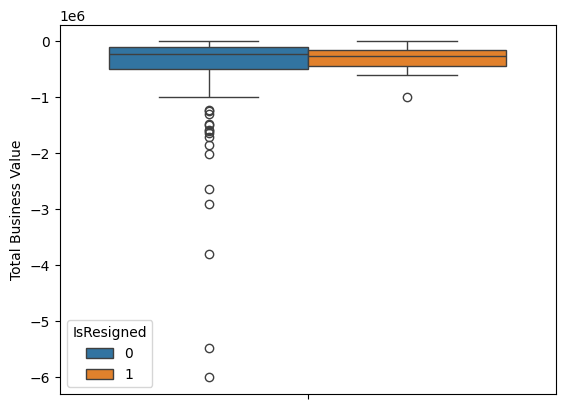

In [303]:
sns.boxplot(y=df_business_value['Total Business Value'], hue=df_business_value['IsResigned'])
plt.show()

In [258]:
df_original.loc[df_original['Driver_ID'] == 787]

,Monthly Reporting Date,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
5283,2019-09-01,787,33,Male,C26,12+,75467,2019-08-30,NaT,3,3,0,1
5284,2019-10-01,787,34,Male,C26,12+,75467,2019-08-30,NaT,3,3,0,1
5285,2019-11-01,787,34,Male,C26,12+,75467,2019-08-30,NaT,3,3,200000,1
5286,2019-12-01,787,34,Male,C26,12+,75467,2019-08-30,NaT,3,3,200000,1
5287,2020-01-01,787,34,Male,C26,12+,75467,2019-08-30,NaT,3,3,8099680,2
5288,2020-02-01,787,34,Male,C26,12+,75467,2019-08-30,NaT,3,3,0,2
5289,2020-03-01,787,34,Male,C26,12+,75467,2019-08-30,NaT,3,3,-5483890,2
5290,2020-04-01,787,34,Male,C26,12+,75467,2019-08-30,NaT,3,3,-1608240,1
5291,2020-05-01,787,34,Male,C26,12+,75467,2019-08-30,NaT,3,3,0,1
5292,2020-06-01,787,34,Male,C26,12+,75467,2019-08-30,NaT,3,3,300000,1


In [ ]:
aggregated_df = df_original.groupby('Driver_ID').agg({'Monthly Reporting Date': 'max'                           # Most recent record/reporting
                                                      , 'Age': 'max'                                            # most recent age
                                                      , 'Gender': 'first'                                       # static
                                                      , 'City': 'first'                                         # static
                                                      , 'Education_Level': 'first'                              # static
                                                      , 'Income': 'first'                                       # static
                                                      , 'Dateofjoining': 'first'                                # static
                                                      , 'LastWorkingDate': lambda x: x[x.notna()].min()         # for reference
                                                      , 'Joining Designation': 'first'                          # static
                                                      , 'Grade': 'last'                                         # most recent grade
                                                      , 'Total Business Value': 'sum'                           # cumulative performance
                                                      , 'Quarterly Rating': 'mean'                              # average performance
                                                      }).reset_index()

| Column                   | Aggregation Type | Reason                                                    |
| ------------------------ | ---------------- | --------------------------------------------------------- |
| `Age`                    | `max`            | Reflects most recent known age. Age progresses over time. |
| `Gender`                 | `first`          | Gender is assumed constant for each driver.               |
| `City`                   | `first`          | Assumed stable. Use `mode` if city may change.            |
| `Education_Level`        | `first`          | Doesn't change over time. Static personal attribute.      |
| `Income`                 | `mean`           | To capture average earning level across months.           |
| `Dateofjoining`          | `first`          | Joining date is constant by definition.                   |
| `LastWorkingDate`        | `last`           | Most recent non-null resignation date, if exists.         |
| `Joining Designation`    | `first`          | Usually fixed at time of joining.                         |
| `Grade`                  | `last`           | Grade can change — latest reflects current position.      |
| `Total Business Value`   | `sum`            | Represents driver’s cumulative business contribution.     |
| `Quarterly Rating`       | `mean`           | Average performance is a good indicator across time.      |
| `Monthly Reporting Date` | `max`            | Latest report indicates freshness of record.              |
| `hasDriverResigned`      | `max`            | Becomes 1 if at least one resignation is recorded.        |


In [ ]:
aggregated_df.head()

,Driver_ID,Monthly Reporting Date,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,1,2019-03-01,28,Male,C23,2,57387.0,2018-12-24,2019-03-11,1,1,1715580,2.0
1,2,2020-12-01,31,Male,C7,2,67016.0,2020-11-06,NaN,2,2,0,1.0
2,4,2020-04-01,43,Male,C13,2,65603.0,2019-12-07,2020-04-27,2,2,350000,1.0
3,5,2019-03-01,29,Male,C9,0,46368.0,2019-01-09,2019-03-07,1,1,120360,1.0
4,6,2020-12-01,31,Female,C11,1,78728.0,2020-07-31,NaN,3,3,1265000,1.6


In [ ]:
aggregated_df.loc[aggregated_df['Driver_ID'] == 1]

,Driver_ID,Monthly Reporting Date,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,1,2019-03-01,28,Male,C23,2,57387.0,2018-12-24,2019-03-11,1,1,1715580,2.0


In [ ]:
aggregated_df.loc[aggregated_df['Driver_ID'] == 2194]

,Driver_ID,Monthly Reporting Date,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
1867,2194,2020-07-01,36,Female,C20,0,90033.0,2013-09-29,2020-07-10,4,4,16342310,1.842105


In [ ]:
aggregated_df.loc[aggregated_df['Driver_ID'] == 2784]

,Driver_ID,Monthly Reporting Date,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
2376,2784,2020-12-01,34,Male,C24,0,82815.0,2015-10-15,NaN,2,3,21748820,2.625


In [ ]:
aggregated_df.shape

(2381, 13)

In [ ]:
aggregated_df['Driver_ID'].nunique()

2381

##**Creating new features**

In [ ]:
df1 = aggregated_df.copy()

In [ ]:
df1['DOJ_Year'] = pd.to_datetime(df1['Dateofjoining']).dt.year
df1['DOJ_Quarter'] = pd.to_datetime(df1['Dateofjoining']).dt.quarter
df1['DOJ_Month'] = pd.to_datetime(df1['Dateofjoining']).dt.month
df1['DOJ_Month_sin'] = np.sin(2 * np.pi * df1['DOJ_Month'] / 12)
df1['DOJ_Month_cos'] = np.cos(2 * np.pi * df1['DOJ_Month'] / 12)

In [ ]:
df1['IsResigned'] = (~df1['LastWorkingDate'].isna()).astype(int)

In [ ]:
df1['LWD_Filled'] = df1['LastWorkingDate'].fillna(df1['Monthly Reporting Date'])
df1['LWD_Filled'] = pd.to_datetime(df1['LWD_Filled'])
df1['Dateofjoining'] = pd.to_datetime(df1['Dateofjoining'])

df1['Days_Active'] = (df1['LWD_Filled'] - df1['Dateofjoining']).dt.days

In [ ]:
def tag_engagement(days):
    if days < 90:
        return 'Short-Term'
    elif days < 365:
        return 'Mid-Term'
    else:
        return 'Long-Term'

df1['Engagement_Type'] = df1['Days_Active'].apply(tag_engagement)

In [ ]:
df1['IsNewDriver'] = df1['Days_Active'].apply(lambda x: 1 if x < 90 else 0)

In [ ]:
df1['Days_Since_Resignation'] = (pd.to_datetime('today') - pd.to_datetime(df1['LastWorkingDate'])).dt.days.fillna(0).astype(int)

##**Exploratory Data Analysis**

In [ ]:
df3 = df1.copy()

In [335]:
df3.iloc[:5,:15]

,Driver_ID,Monthly Reporting Date,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,DOJ_Year,DOJ_Quarter
0,1,2019-03-01,28,Male,C23,2,57387.0,2018-12-24,2019-03-11,1,1,1715580,2.0,2018,4
1,2,2020-12-01,31,Male,C7,2,67016.0,2020-11-06,NaN,2,2,0,1.0,2020,4
2,4,2020-04-01,43,Male,C13,2,65603.0,2019-12-07,2020-04-27,2,2,350000,1.0,2019,4
3,5,2019-03-01,29,Male,C9,0,46368.0,2019-01-09,2019-03-07,1,1,120360,1.0,2019,1
4,6,2020-12-01,31,Female,C11,1,78728.0,2020-07-31,NaN,3,3,1265000,1.5,2020,3


In [334]:
df3.iloc[:5,15:]

,DOJ_Month,DOJ_Month_sin,DOJ_Month_cos,IsResigned,LWD_Filled,Days_Active,Engagement_Type,IsNewDriver,Days_Since_Resignation
0,12,-2.449294e-16,1.000000,1,2019-03-11,77,Short-Term,1,2310
1,11,-5.000000e-01,0.866025,0,2020-12-01,25,Short-Term,1,0
2,12,-2.449294e-16,1.000000,1,2020-04-27,142,Mid-Term,0,1897
3,1,5.000000e-01,0.866025,1,2019-03-07,57,Short-Term,1,2314
4,7,-5.000000e-01,-0.866025,0,2020-12-01,123,Mid-Term,0,0


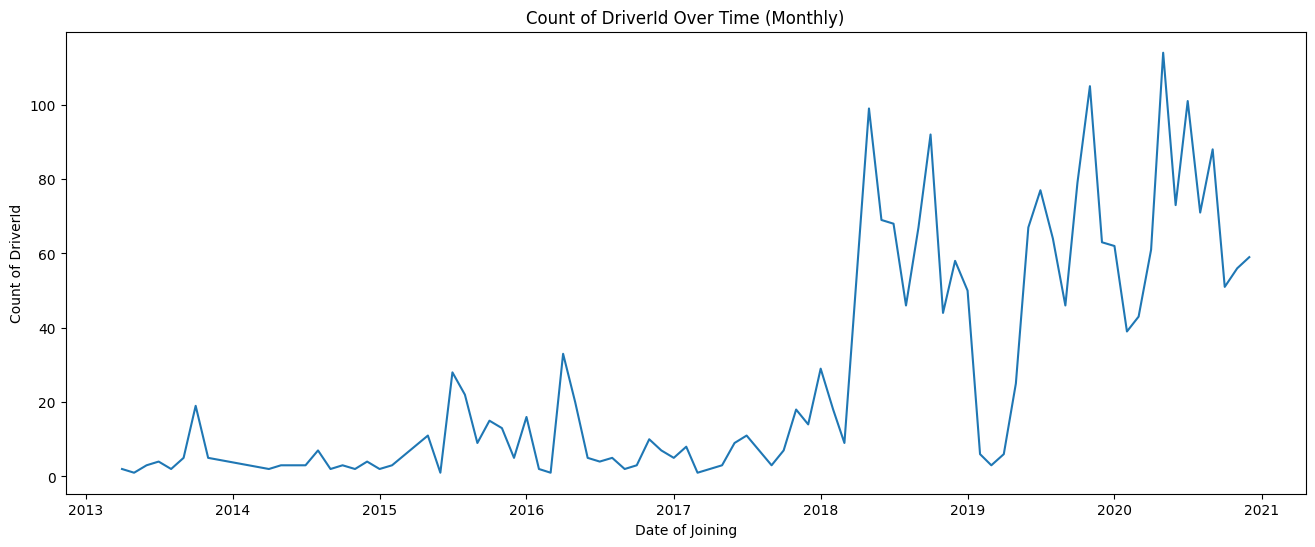

In [311]:
plt.figure(figsize=(16, 6))

df_plot = df3.groupby(pd.to_datetime(df3['Dateofjoining']).dt.to_period('M')).agg({'Driver_ID':'count'}).reset_index().sort_values(by='Dateofjoining')
df_plot['Dateofjoining'] = df_plot['Dateofjoining'].dt.to_timestamp()

sns.lineplot(x='Dateofjoining', y='Driver_ID', data=df_plot)
plt.title('Count of DriverId Over Time (Monthly)')
plt.xlabel('Date of Joining')
plt.ylabel('Count of DriverId')
plt.show()

In [340]:
df3.groupby('DOJ_Year').agg({'Driver_ID': 'count'}).reset_index()

,DOJ_Year,Driver_ID
0,2013,41
1,2014,29
2,2015,109
3,2016,108
4,2017,86
5,2018,599
6,2019,591
7,2020,818


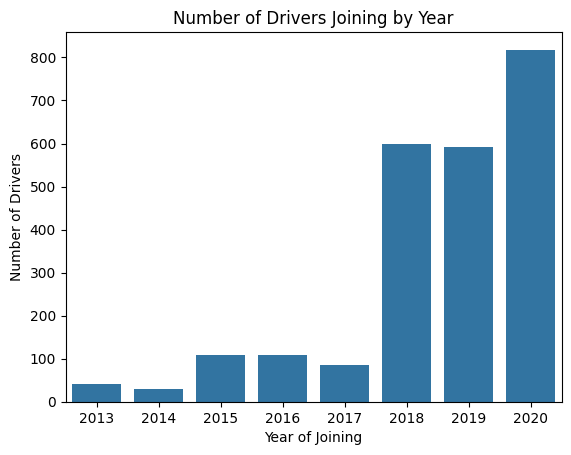

In [339]:
sns.barplot(x='DOJ_Year', y='Driver_ID', data=df3.groupby('DOJ_Year').agg({'Driver_ID': 'count'}).reset_index())
plt.title('Number of Drivers Joining by Year')
plt.xlabel('Year of Joining')
plt.ylabel('Number of Drivers')
plt.show()

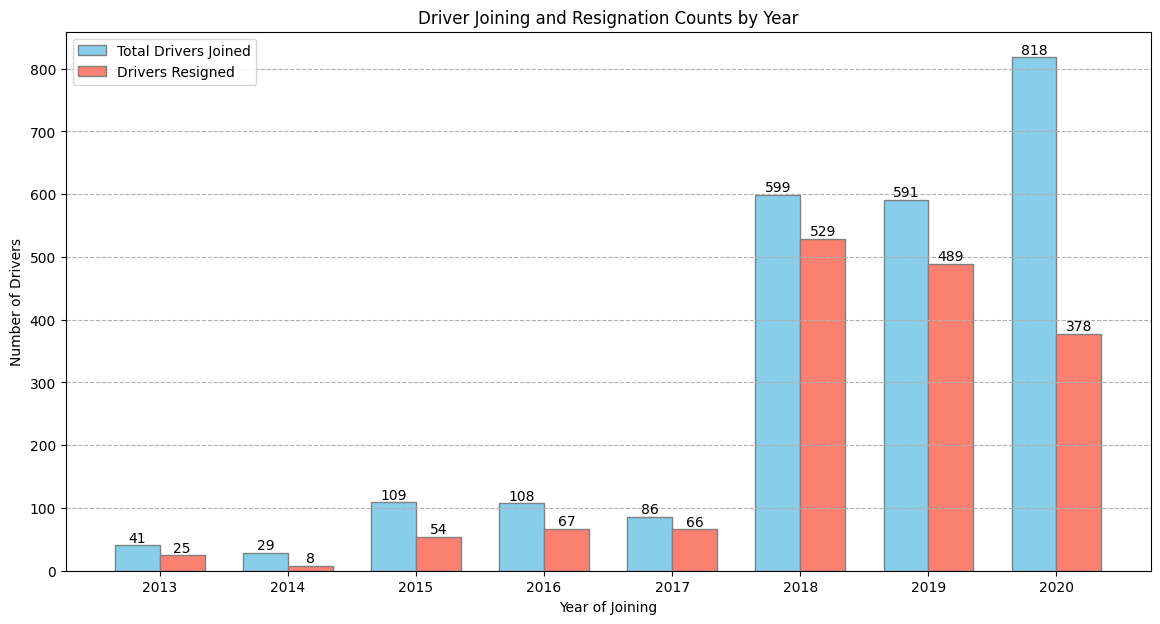

In [341]:
joined_drivers_year = df3.groupby(df3['Dateofjoining'].dt.year).size().reset_index(name='Total_Drivers_Joined')
joined_drivers_year.rename(columns={'Dateofjoining': 'Year_of_Joining'}, inplace=True)

resigned_drivers_year = df3[df3['LastWorkingDate'].notna()].groupby(df3['Dateofjoining'].dt.year).size().reset_index(name='Drivers_Resigned')
resigned_drivers_year.rename(columns={'Dateofjoining': 'Year_of_Joining'}, inplace=True)

driver_counts_by_year = pd.merge(joined_drivers_year, resigned_drivers_year, on='Year_of_Joining', how='left').fillna(0)

# Plotting
plt.figure(figsize=(14, 7))
bar_width = 0.35
r1 = np.arange(len(driver_counts_by_year['Year_of_Joining']))
r2 = [x + bar_width for x in r1]

bars1 = plt.bar(r1, driver_counts_by_year['Total_Drivers_Joined'], color='skyblue', width=bar_width, edgecolor='grey', label='Total Drivers Joined')
bars2 = plt.bar(r2, driver_counts_by_year['Drivers_Resigned'], color='salmon', width=bar_width, edgecolor='grey', label='Drivers Resigned')

plt.xlabel('Year of Joining')
plt.ylabel('Number of Drivers')
plt.title('Driver Joining and Resignation Counts by Year')
plt.xticks([r + bar_width/2 for r in range(len(driver_counts_by_year['Year_of_Joining']))], driver_counts_by_year['Year_of_Joining'].astype(int))
plt.legend()
plt.grid(axis='y', linestyle='--')

for bar in bars1:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center') # va: vertical alignment, ha: horizontal alignment
for bar in bars2:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.show()

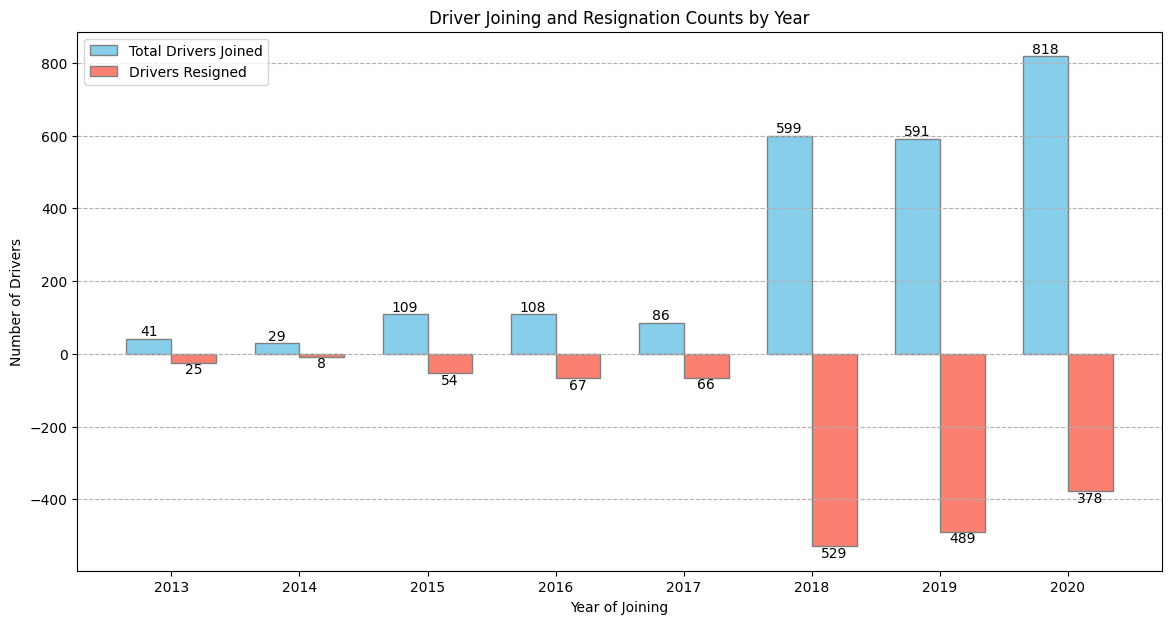

In [329]:
plt.figure(figsize=(14, 7))
bar_width = 0.35
r1 = np.arange(len(driver_counts_by_year['Year_of_Joining']))
r2 = [x + bar_width for x in r1]
bars1 = plt.bar(r1, driver_counts_by_year['Total_Drivers_Joined'], color='skyblue', width=bar_width, edgecolor='grey', label='Total Drivers Joined')
# Plotting resigned drivers below the x-axis
bars2 = plt.bar(r2, -driver_counts_by_year['Drivers_Resigned'], color='salmon', width=bar_width, edgecolor='grey', label='Drivers Resigned')
plt.xlabel('Year of Joining')
plt.ylabel('Number of Drivers')
plt.title('Driver Joining and Resignation Counts by Year')
plt.xticks([r + bar_width/2 for r in range(len(driver_counts_by_year['Year_of_Joining']))], driver_counts_by_year['Year_of_Joining'].astype(int))
plt.legend()
plt.grid(axis='y', linestyle='--')
# Add labels above the bars for joined drivers
for bar in bars1:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
# Add labels below the bars for resigned drivers (using absolute value for the text)
for bar in bars2:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, int(abs(yval)), va='top', ha='center') # va: vertical alignment, ha: horizontal alignment
plt.show()

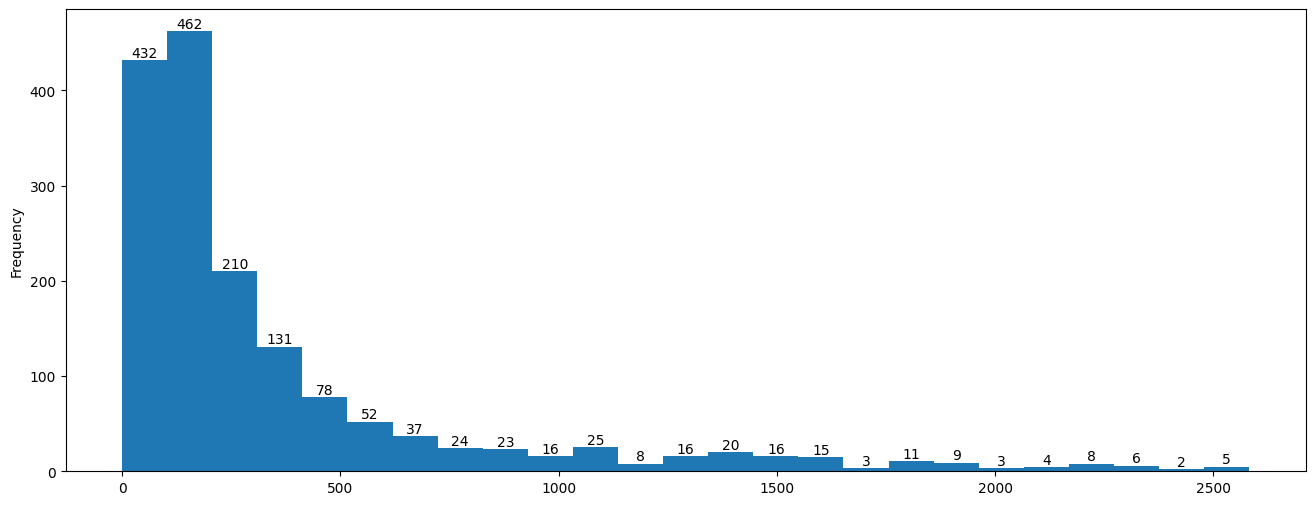

In [323]:
plt.figure(figsize=(16, 6))
ax = df3.loc[df3['IsResigned'] == 1]['Days_Active'].plot(kind='hist', bins=25)

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, color='black')
plt.show()

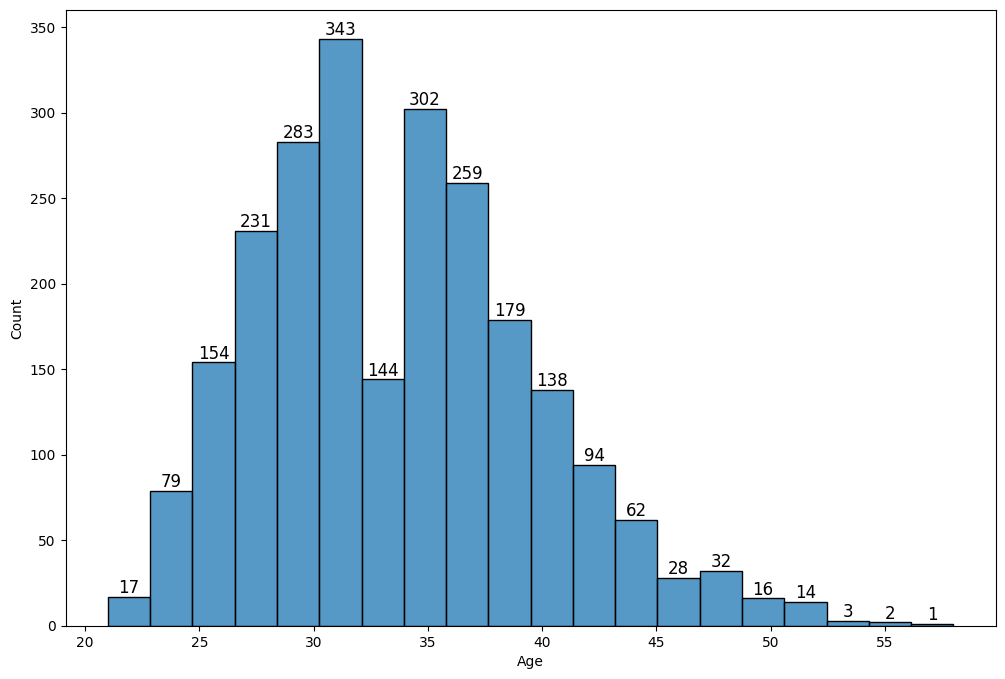

In [ ]:
plt.figure(figsize=(12, 8))
ax = sns.histplot(df3['Age'], bins=20)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=12, color='black')
plt.show()

In [ ]:
pd.crosstab(df3['Gender'], df3['Education_Level'])

Education_Level,0,1,2
Gender,,,
Female,323,332,322
Male,461,463,480


In [ ]:
pd.crosstab(df3['Grade'], df3['IsResigned'])

IsResigned,0,1
Grade,,
1,145,596
2,255,600
3,286,337
4,68,70
5,11,13


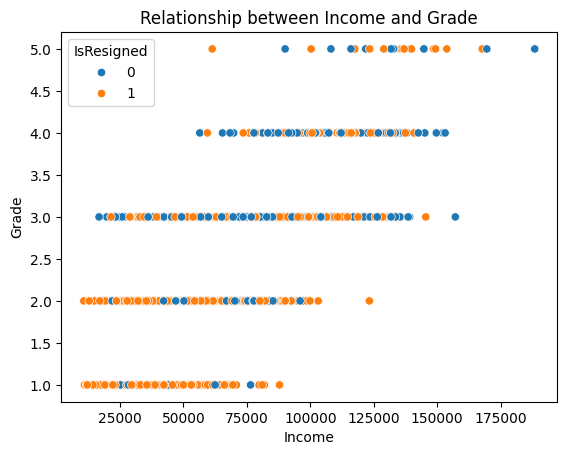

In [ ]:
sns.scatterplot(x='Income', y='Grade', data=df3, hue='IsResigned')
plt.title('Relationship between Income and Grade')
plt.show()

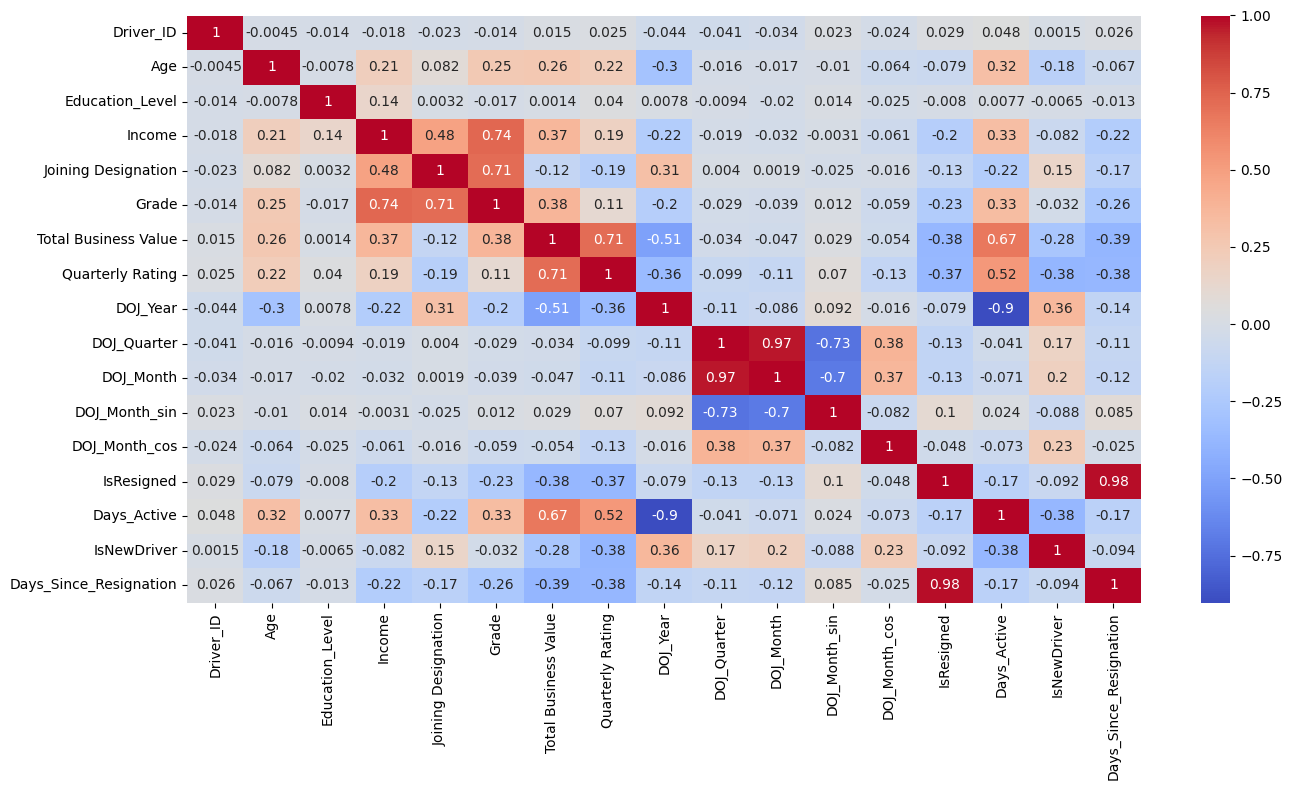

In [ ]:
df_numeric = df3.select_dtypes(include=np.number)
plt.figure(figsize=(14, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.tight_layout()
plt.show()

In [ ]:
round(df3['Quarterly Rating'],2).value_counts()

,count
Quarterly Rating,
1.00,1202
2.00,116
1.60,88
1.75,72
2.50,69
...,...
1.73,1
1.14,1
1.70,1


In [ ]:
def round_to_half(x):
    return round(x * 2) / 2
df3['Quarterly Rating'] = df3['Quarterly Rating'].apply(round_to_half)

print(df3['Quarterly Rating'].value_counts())

Quarterly Rating
1.0    1228
2.0     365
1.5     335
2.5     217
3.0     186
3.5      34
4.0      16
Name: count, dtype: int64


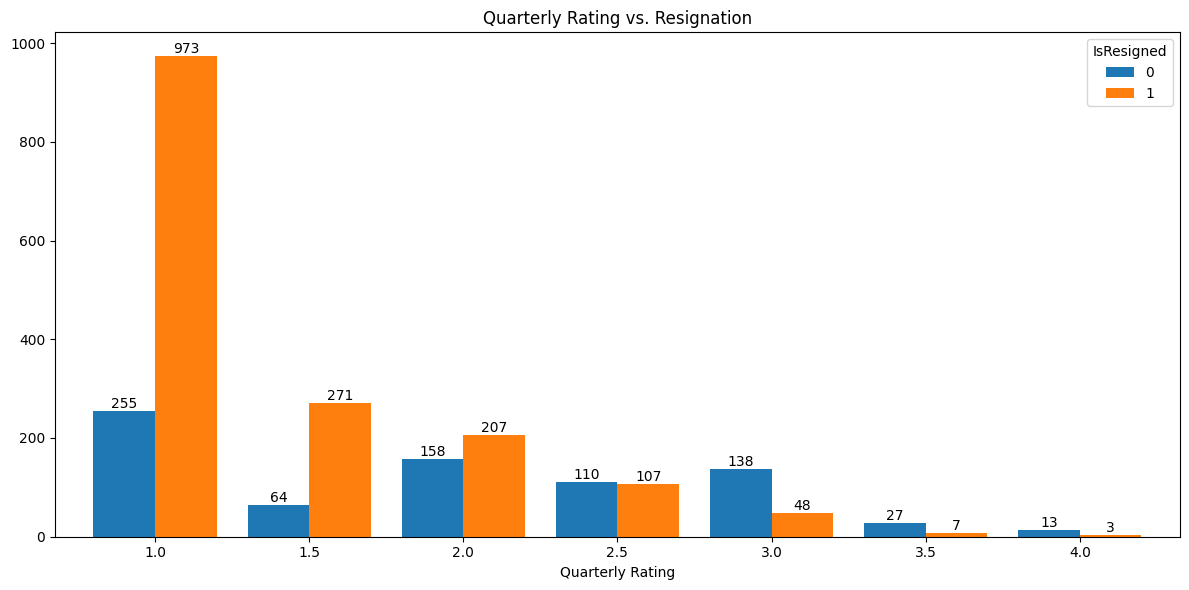

In [ ]:
plt.figure(figsize=(12, 6))
ax = pd.crosstab(df3['Quarterly Rating'], df3['IsResigned']).plot(kind='bar', ax=plt.gca(), width=0.8)
plt.title('Quarterly Rating vs. Resignation')
plt.xlabel('Quarterly Rating')
plt.xticks(rotation=0)

for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(df3['Grade'], df3['Quarterly Rating'])

Quarterly Rating,1.0,1.5,2.0,2.5,3.0,3.5,4.0
Grade,,,,,,,
1,405,107,102,69,52,6,0
2,458,117,126,78,59,8,9
3,326,85,95,43,53,14,7
4,28,24,39,24,18,5,0
5,11,2,3,3,4,1,0


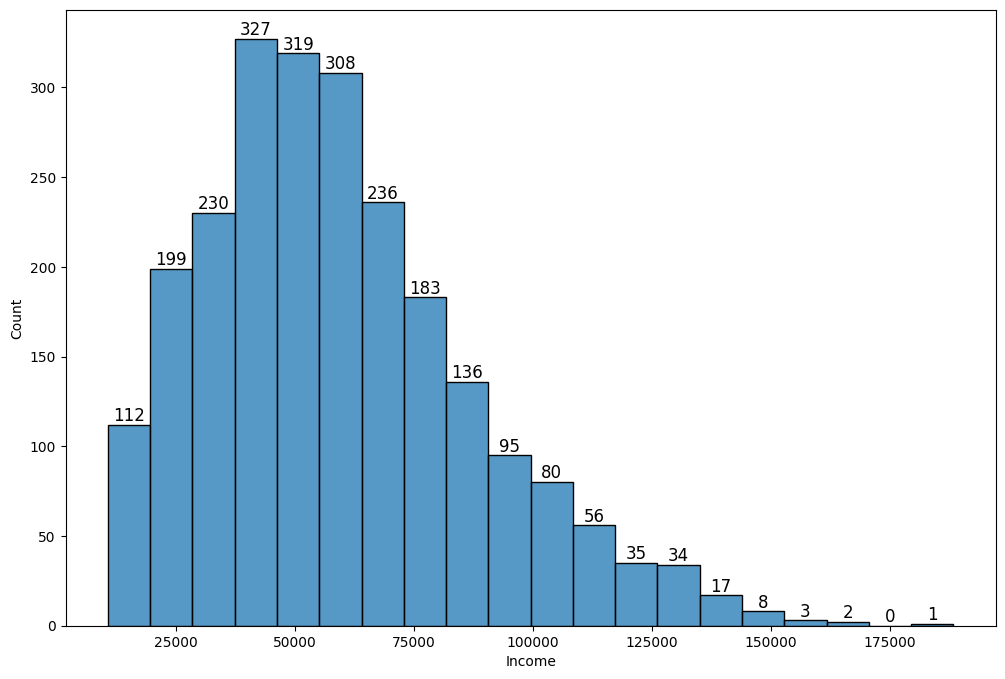

In [ ]:
plt.figure(figsize=(12, 8))
ax = sns.histplot(df3['Income'], bins=20)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=12, color='black')
plt.show()

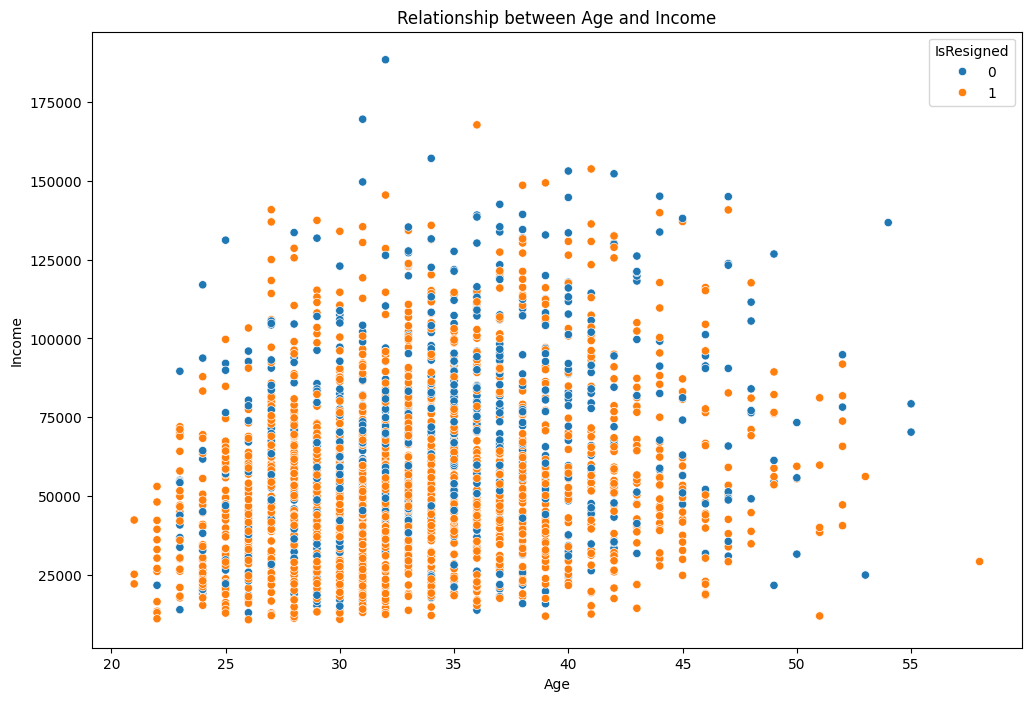

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age', y='Income', data=df3, hue='IsResigned')
plt.title('Relationship between Age and Income')
plt.show()

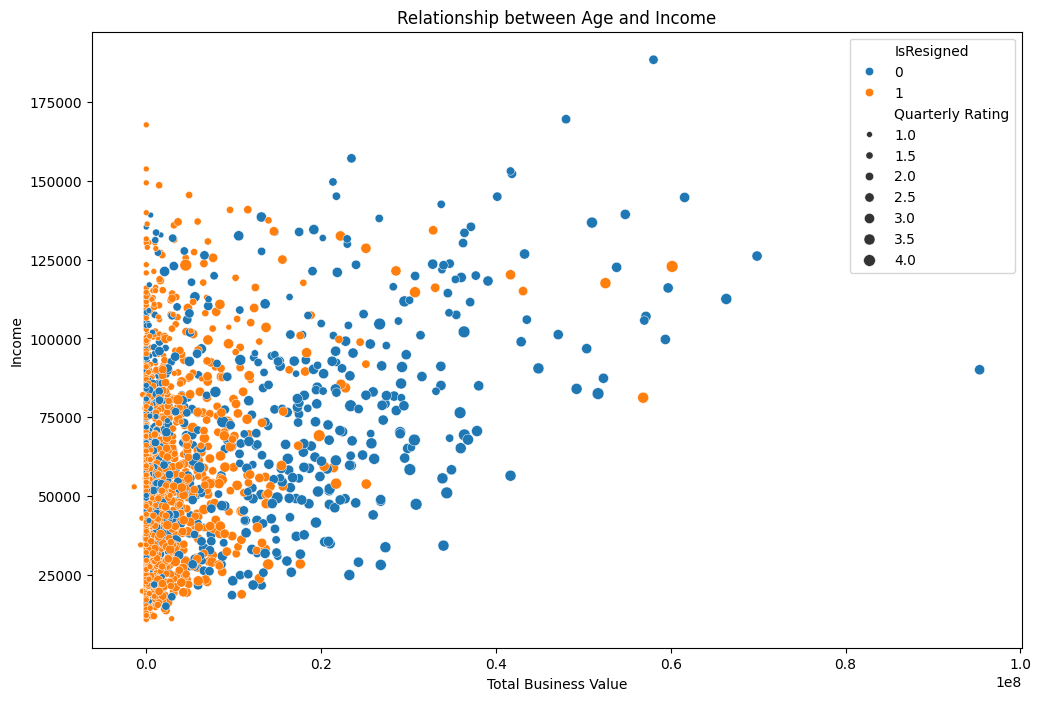

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Total Business Value', y='Income', data=df3, hue='IsResigned', size ='Quarterly Rating')
plt.title('Relationship between Age and Income')
plt.show()

In [ ]:
round(pd.crosstab(df3['IsNewDriver'], df3['IsResigned'], normalize='index')*100, 2)

IsResigned,0,1
IsNewDriver,,
0,29.69,70.31
1,39.72,60.28


##**Statistical Data Analysis**

##**Feature Encoding**

In [ ]:
dfe = df1.copy()

In [ ]:
dfe.iloc[:5,:15]

,Driver_ID,Monthly Reporting Date,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,DOJ_Year,DOJ_Quarter
0,1,2019-03-01,28,Male,C23,2,57387.0,2018-12-24,2019-03-11,1,1,1715580,2.0,2018,4
1,2,2020-12-01,31,Male,C7,2,67016.0,2020-11-06,NaN,2,2,0,1.0,2020,4
2,4,2020-04-01,43,Male,C13,2,65603.0,2019-12-07,2020-04-27,2,2,350000,1.0,2019,4
3,5,2019-03-01,29,Male,C9,0,46368.0,2019-01-09,2019-03-07,1,1,120360,1.0,2019,1
4,6,2020-12-01,31,Female,C11,1,78728.0,2020-07-31,NaN,3,3,1265000,1.6,2020,3


In [ ]:
dfe.iloc[:5,15:]

,DOJ_Month,DOJ_Month_sin,DOJ_Month_cos,IsResigned,LWD_Filled,Days_Active,Engagement_Type,IsNewDriver,Days_Since_Resignation
0,12,-2.449294e-16,1.000000,1,2019-03-11,77,Short-Term,1,2310
1,11,-5.000000e-01,0.866025,0,2020-12-01,25,Short-Term,1,0
2,12,-2.449294e-16,1.000000,1,2020-04-27,142,Mid-Term,0,1897
3,1,5.000000e-01,0.866025,1,2019-03-07,57,Short-Term,1,2314
4,7,-5.000000e-01,-0.866025,0,2020-12-01,123,Mid-Term,0,0


In [ ]:
dfe.columns

Index(['Driver_ID', 'Monthly Reporting Date', 'Age', 'Gender', 'City',
       'Education_Level', 'Income', 'Dateofjoining', 'LastWorkingDate',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating', 'DOJ_Year', 'DOJ_Quarter', 'DOJ_Month',
       'DOJ_Month_sin', 'DOJ_Month_cos', 'IsResigned', 'LWD_Filled',
       'Days_Active', 'Engagement_Type', 'IsNewDriver',
       'Days_Since_Resignation'],
      dtype='object')

In [ ]:
dfe.drop(columns=['Monthly Reporting Date','Driver_ID', 'Dateofjoining', 'LastWorkingDate', 'LWD_Filled'], inplace=True)

In [ ]:
dfe.iloc[:5,:15]

,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,DOJ_Year,DOJ_Quarter,DOJ_Month,DOJ_Month_sin,DOJ_Month_cos,IsResigned
0,28,Male,C23,2,57387.0,1,1,1715580,2.0,2018,4,12,-2.449294e-16,1.000000,1
1,31,Male,C7,2,67016.0,2,2,0,1.0,2020,4,11,-5.000000e-01,0.866025,0
2,43,Male,C13,2,65603.0,2,2,350000,1.0,2019,4,12,-2.449294e-16,1.000000,1
3,29,Male,C9,0,46368.0,1,1,120360,1.0,2019,1,1,5.000000e-01,0.866025,1
4,31,Female,C11,1,78728.0,3,3,1265000,1.6,2020,3,7,-5.000000e-01,-0.866025,0


In [ ]:
dfe.iloc[:5,15:]

,Days_Active,Engagement_Type,IsNewDriver,Days_Since_Resignation
0,77,Short-Term,1,2310
1,25,Short-Term,1,0
2,142,Mid-Term,0,1897
3,57,Short-Term,1,2314
4,123,Mid-Term,0,0


In [ ]:
dfe['Gender'] = dfe['Gender'].map({'Male': 0, 'Female': 1}).astype(int)

In [ ]:
len(dfe['City'].value_counts())

29

In [ ]:
city_freq = dfe['City'].value_counts()
dfe['City_freq_encoded'] = dfe['City'].map(city_freq)
dfe.drop(columns=['City'], inplace=True)

In [ ]:
dfe['Engagement_Type'] = dfe['Engagement_Type'].map({'Short-Term': 1, 'Mid-Term': 2, 'Long-Term': 3})

In [ ]:
df = dfe.copy()

In [ ]:
dfe.iloc[:5, :10]

,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,DOJ_Year,DOJ_Quarter
0,28,0,2,57387.0,1,1,1715580,2.0,2018,4
1,31,0,2,67016.0,2,2,0,1.0,2020,4
2,43,0,2,65603.0,2,2,350000,1.0,2019,4
3,29,0,0,46368.0,1,1,120360,1.0,2019,1
4,31,1,1,78728.0,3,3,1265000,1.6,2020,3


In [ ]:
dfe.iloc[:5, 10:]

,DOJ_Month,DOJ_Month_sin,DOJ_Month_cos,IsResigned,Days_Active,Engagement_Type,IsNewDriver,Days_Since_Resignation,City_freq_encoded
0,12,-2.449294e-16,1.000000,1,77,1,1,2310,74
1,11,-5.000000e-01,0.866025,0,25,1,1,0,76
2,12,-2.449294e-16,1.000000,1,142,2,0,1897,71
3,1,5.000000e-01,0.866025,1,57,1,1,2314,75
4,7,-5.000000e-01,-0.866025,0,123,2,0,0,64


##**Model Evaluation**

In [ ]:
df = dfe.copy()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(columns=['IsResigned'])
y = df['IsResigned']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

In [ ]:
df['IsResigned'].value_counts(normalize=True)*100

,proportion
IsResigned,
1,67.870643
0,32.129357


In [ ]:
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
log_reg = LogisticRegression(class_weight='balanced', random_state=1)
rf = RandomForestClassifier(class_weight='balanced', random_state=1)
dt = DecisionTreeClassifier(random_state=1)
nb = GaussianNB()
knn = KNeighborsClassifier()
svm = SVC(probability=True)  # To use in voting classifier
xgb = XGBClassifier(scale_pos_weight=5, use_label_encoder=False, eval_metric='logloss', random_state=1)
gb = GradientBoostingClassifier(random_state=1)
voting = VotingClassifier(estimators=[('lr', log_reg), ('xgb', xgb), ('rf', rf)], voting='soft')

models = {
    'Logistic Regression': log_reg,
    'Random Forest': rf,
    'Decision Tree': dt,
    'Naive Bayes': nb,
    'KNN': knn,
    'SVM': svm,
    'XGBoost': xgb,
    'Gradient Boosting': gb,
    'Voting Ensemble': voting
}

# Train and evaluate all models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print("\n\n")
    print(f'--- {name} ---')
    print(classification_report(y_test, y_pred))
    print(f'Confusion Matrix for {name}')
    print(confusion_matrix(y_test, y_pred))




--- Logistic Regression ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00       324

    accuracy                           1.00       477
   macro avg       1.00      1.00      1.00       477
weighted avg       1.00      1.00      1.00       477

Confusion Matrix for Logistic Regression
[[153   0]
 [  0 324]]



--- Random Forest ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00       324

    accuracy                           1.00       477
   macro avg       1.00      1.00      1.00       477
weighted avg       1.00      1.00      1.00       477

Confusion Matrix for Random Forest
[[153   0]
 [  0 324]]



--- Decision Tree ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00 

In [ ]:
correlations = df.corr(numeric_only=True)['IsResigned'].sort_values(ascending=False)
print(correlations)

IsResigned                1.000000
Days_Since_Resignation    0.982774
DOJ_Month_sin             0.103637
Gender                    0.008966
City_freq_encoded         0.002690
Education_Level          -0.007953
Engagement_Type          -0.024958
DOJ_Month_cos            -0.047716
DOJ_Year                 -0.078640
Age                      -0.078883
IsNewDriver              -0.092184
Joining Designation      -0.127773
DOJ_Quarter              -0.132165
DOJ_Month                -0.134682
Days_Active              -0.172484
Income                   -0.197988
Grade                    -0.225585
Quarterly Rating         -0.373683
Total Business Value     -0.379552
Name: IsResigned, dtype: float64


In [ ]:
df1 = df.drop(columns=['Days_Since_Resignation'])

In [ ]:
df1.iloc[:5, :10]

,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,DOJ_Year,DOJ_Quarter
0,28,0,2,57387.0,1,1,1715580,2.0,2018,4
1,31,0,2,67016.0,2,2,0,1.0,2020,4
2,43,0,2,65603.0,2,2,350000,1.0,2019,4
3,29,0,0,46368.0,1,1,120360,1.0,2019,1
4,31,1,1,78728.0,3,3,1265000,1.6,2020,3


In [ ]:
df1.iloc[:5, 10:]

,DOJ_Month,DOJ_Month_sin,DOJ_Month_cos,IsResigned,Days_Active,Engagement_Type,IsNewDriver,City_freq_encoded
0,12,-2.449294e-16,1.000000,1,77,1,1,74
1,11,-5.000000e-01,0.866025,0,25,1,1,76
2,12,-2.449294e-16,1.000000,1,142,2,0,71
3,1,5.000000e-01,0.866025,1,57,1,1,75
4,7,-5.000000e-01,-0.866025,0,123,2,0,64


In [ ]:
X1 = df.drop(columns=['IsResigned'])
y1 = df['IsResigned']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, stratify=y, random_state=1)

In [ ]:
X_train_scaled1 = scaler.fit_transform(X_train1)
X_test_scaled1 = scaler.transform(X_test1)

In [ ]:
log_reg = LogisticRegression(class_weight='balanced', random_state=1)
rf = RandomForestClassifier(class_weight='balanced', random_state=1)
dt = DecisionTreeClassifier(random_state=1)
nb = GaussianNB()
knn = KNeighborsClassifier()
svm = SVC(probability=True)
xgb = XGBClassifier(scale_pos_weight=5, use_label_encoder=False, eval_metric='logloss', random_state=1)
gb = GradientBoostingClassifier(random_state=1)
voting = VotingClassifier(estimators=[('lr', log_reg), ('xgb', xgb), ('rf', rf)], voting='soft')

models = {
    'Logistic Regression': log_reg,
    'Random Forest': rf,
    'Decision Tree': dt,
    'Naive Bayes': nb,
    'KNN': knn,
    'SVM': svm,
    'XGBoost': xgb,
    'Gradient Boosting': gb,
    'Voting Ensemble': voting
}

# Train and evaluate all models
for name, model in models.items():
    model.fit(X_train_scaled1, y_train1)
    y_pred1 = model.predict(X_test_scaled1)
    print("\n\n")
    print(f'--- {name} ---')
    print(classification_report(y_test1, y_pred1))
    print(f'Confusion Matrix for {name}')
    print(confusion_matrix(y_test1, y_pred1))




--- Logistic Regression ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00       324

    accuracy                           1.00       477
   macro avg       1.00      1.00      1.00       477
weighted avg       1.00      1.00      1.00       477

Confusion Matrix for Logistic Regression
[[153   0]
 [  0 324]]



--- Random Forest ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00       324

    accuracy                           1.00       477
   macro avg       1.00      1.00      1.00       477
weighted avg       1.00      1.00      1.00       477

Confusion Matrix for Random Forest
[[153   0]
 [  0 324]]



--- Decision Tree ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00 

In [ ]:
df_original.columns

Index(['Monthly Reporting Date', 'Driver_ID', 'Age', 'Gender', 'City',
       'Education_Level', 'Income', 'Dateofjoining', 'LastWorkingDate',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating'],
      dtype='object')

In [ ]:
df1.columns

Index(['Age', 'Gender', 'Education_Level', 'Income', 'Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating', 'DOJ_Year',
       'DOJ_Quarter', 'DOJ_Month', 'DOJ_Month_sin', 'DOJ_Month_cos',
       'IsResigned', 'Days_Active', 'Engagement_Type', 'IsNewDriver',
       'City_freq_encoded'],
      dtype='object')

In [ ]:
df2 = df1[['Age'
          , 'Gender'
          , 'City_freq_encoded'
          , 'Education_Level'
          , 'Income'
          , 'DOJ_Year'
          , 'DOJ_Quarter'
          , 'DOJ_Month'
          , 'DOJ_Month_sin'
          , 'DOJ_Month_cos'
          , 'Joining Designation'
          , 'Grade'
          , 'Total Business Value'
          , 'Quarterly Rating'
          , 'IsResigned']]

In [ ]:
X2 = df2.drop(columns=['IsResigned'])
y2 = df2['IsResigned']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, stratify=y2, random_state=1)

In [ ]:
X_train_scaled2 = scaler.fit_transform(X_train2)
X_test_scaled2 = scaler.transform(X_test2)

In [ ]:
log_reg = LogisticRegression(class_weight='balanced', random_state=1)
rf = RandomForestClassifier(class_weight='balanced', random_state=1)
dt = DecisionTreeClassifier(random_state=1)
nb = GaussianNB()
knn = KNeighborsClassifier()
svm = SVC(probability=True)
xgb = XGBClassifier(scale_pos_weight=5, use_label_encoder=False, eval_metric='logloss', random_state=1)
gb = GradientBoostingClassifier(random_state=1)
voting = VotingClassifier(estimators=[('lr', log_reg), ('xgb', xgb), ('rf', rf)], voting='soft')

models = {
    'Logistic Regression': log_reg,
    'Random Forest': rf,
    'Decision Tree': dt,
    'Naive Bayes': nb,
    'KNN': knn,
    'SVM': svm,
    'XGBoost': xgb,
    'Gradient Boosting': gb,
    'Voting Ensemble': voting
}

# Train and evaluate all models
for name, model in models.items():
    model.fit(X_train_scaled2, y_train2)
    y_pred2 = model.predict(X_test_scaled2)
    print("\n\n")
    print(f'--- {name} ---')
    print(classification_report(y_test2, y_pred2))
    print(f'Confusion Matrix for {name}')
    print(confusion_matrix(y_test2, y_pred2))




--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.72      0.86      0.78       153
           1       0.93      0.84      0.88       324

    accuracy                           0.84       477
   macro avg       0.82      0.85      0.83       477
weighted avg       0.86      0.84      0.85       477

Confusion Matrix for Logistic Regression
[[131  22]
 [ 52 272]]



--- Random Forest ---
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       153
           1       0.90      0.92      0.91       324

    accuracy                           0.88       477
   macro avg       0.86      0.85      0.86       477
weighted avg       0.88      0.88      0.88       477

Confusion Matrix for Random Forest
[[121  32]
 [ 27 297]]



--- Decision Tree ---
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       153
           1       0.88      0.88 

### **since recall is key here — catching resigned employees**

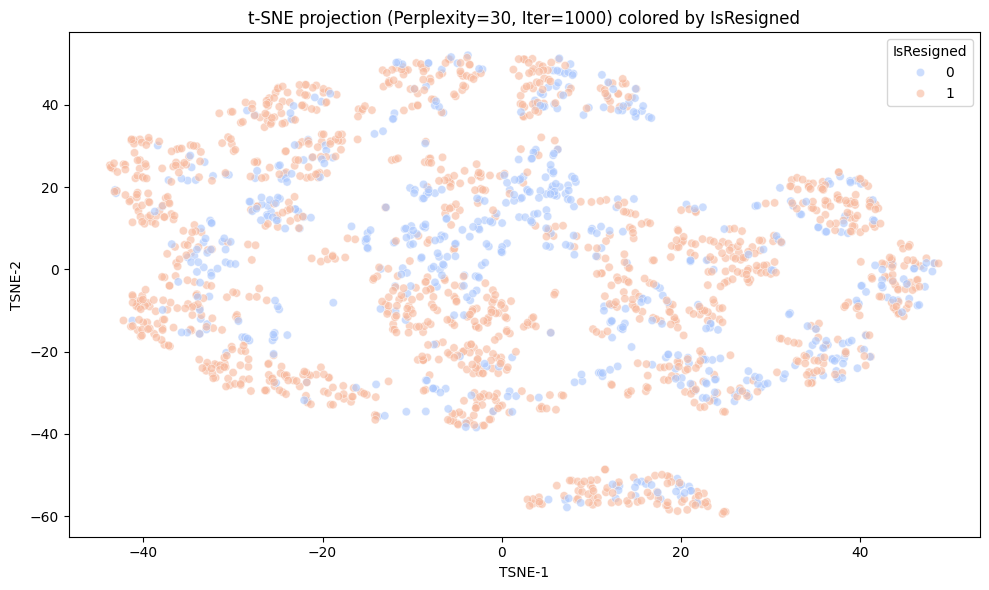

In [ ]:
from sklearn.manifold import TSNE

# Run t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
tsne_results = tsne.fit_transform(X_train_scaled2)

tsne_df = pd.DataFrame()
tsne_df['TSNE-1'] = tsne_results[:, 0]
tsne_df['TSNE-2'] = tsne_results[:, 1]
tsne_df['IsResigned'] = y_train2.values

plt.figure(figsize=(10, 6))
sns.scatterplot(x="TSNE-1", y="TSNE-2", hue="IsResigned", palette="coolwarm", data=tsne_df, alpha=0.6)
plt.title('t-SNE projection (Perplexity=30, Iter=1000) colored by IsResigned')
plt.legend(title='IsResigned')
plt.tight_layout()
plt.show()

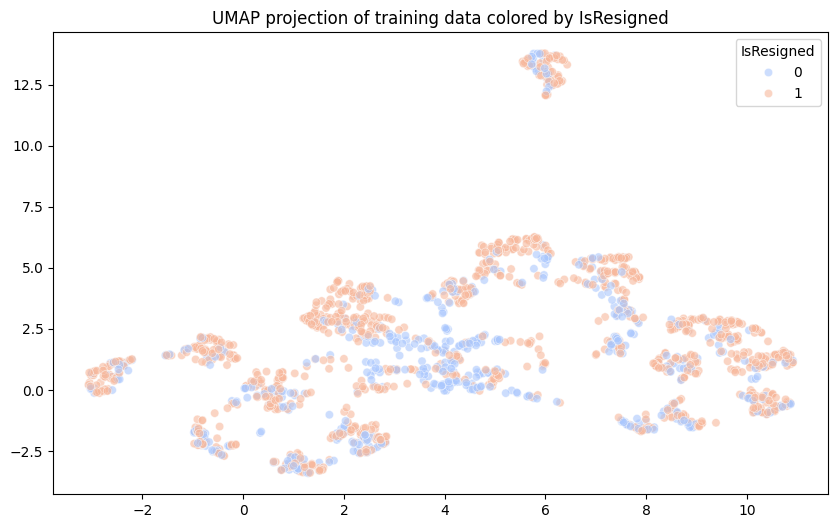

In [ ]:
from umap import UMAP

umap = UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
embedding = umap.fit_transform(X_train_scaled2)

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=y_train2, palette='coolwarm', alpha=0.6)
plt.title('UMAP projection of training data colored by IsResigned')
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled2, y_train2)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred2 = xgb.predict(X_test_scaled2)

print(confusion_matrix(y_test2, y_pred2))
print(classification_report(y_test2, y_pred2))

[[123  30]
 [ 33 291]]
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       153
           1       0.91      0.90      0.90       324

    accuracy                           0.87       477
   macro avg       0.85      0.85      0.85       477
weighted avg       0.87      0.87      0.87       477



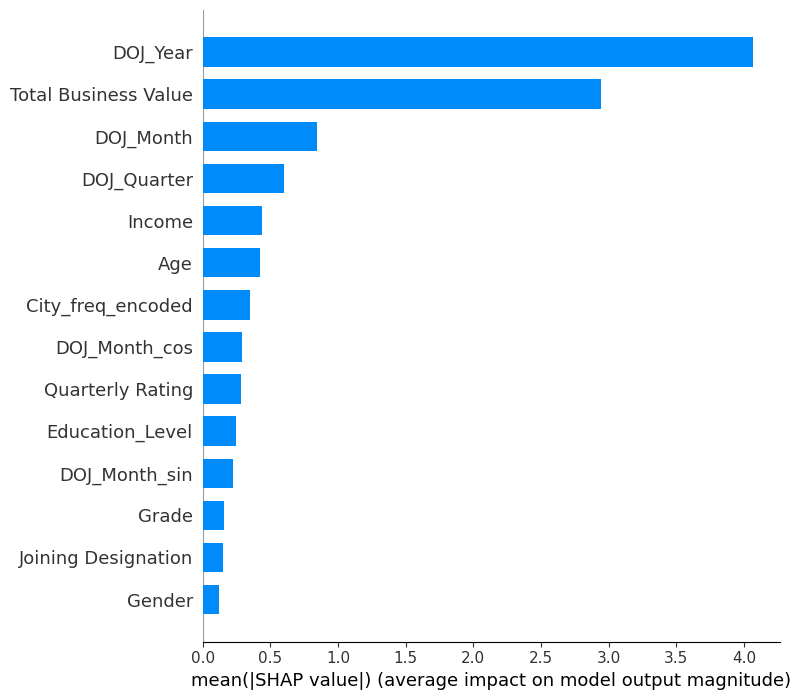

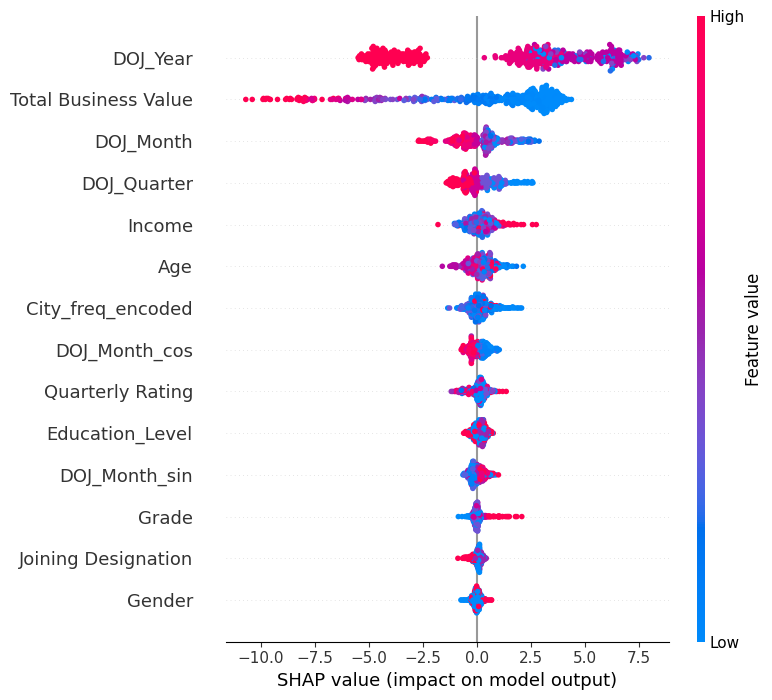

In [ ]:
import shap
explainer = shap.Explainer(xgb, X_train_smote)
shap_values = explainer(X_test_scaled2, check_additivity=False)

# Select only numerical columns from X_test2 for plotting
X_test2_numerical = X_test2.select_dtypes(include=['number'])

# Summary Plot
shap.summary_plot(shap_values, X_test2_numerical, plot_type="bar")

# Detailed Feature Impact
shap.summary_plot(shap_values, X_test2_numerical)

Hyper Parameter tuning based on Recall as identifying the negatives are important